## 1. Introduction

This case study aims to understand the different variables/factors  that affect the price  of residential homes in Ames, Iowa.


#### Steps involved:
- Reading ,understanding and visualizing the data 
- Performing EDA
- Preparing the data for modelling (train-test split,rescaling)
- Training the model
- Residual analysis
- Predictions and evaluation on the test data

#### Step 1: 
Reading ,understanding and visualizing the data

In [4179]:
#Import the important python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [4180]:
# Setting maximum rows and columns display size to 200 for better visibility of data 
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [4181]:
#Read the dataset 
housing=pd.read_csv("train.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4182]:
#Read the shape
housing.shape

(1460, 81)

In [4183]:
#Read the columns
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4184]:
# Check the summary for the numeric columns
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4185]:
# Creating dataframe for numeric and categorical features separately 
numeric_df = housing.select_dtypes(include=['int64', 'float64'])
categorical_df = housing.select_dtypes(include=['object'])

In [4186]:
numeric_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [4187]:
numeric_df.shape

(1460, 38)

In [4188]:
categorical_df.shape

(1460, 43)

In [4189]:
categorical_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [4190]:
# Check for missing values in percentage 
round(100 * housing.isnull().mean(),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [4191]:
# Extract the column names with more than 50% data missing and their respective missing value percentage
missing50 = list(filter(lambda x: x[1] > 50 , round(100 * housing.isnull().sum() / len(housing.index),2).iteritems()))
# Extract the column names from the above list
cols_to_drop = [i[0] for i in missing50]
cols_to_drop

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [4192]:
# Remove the columns with more than 50% missing values
housing.drop(cols_to_drop, axis = 1, inplace = True)
# Check the shape 
housing.shape

(1460, 77)

#### Heatmap to Understand the correlation between the numerial features

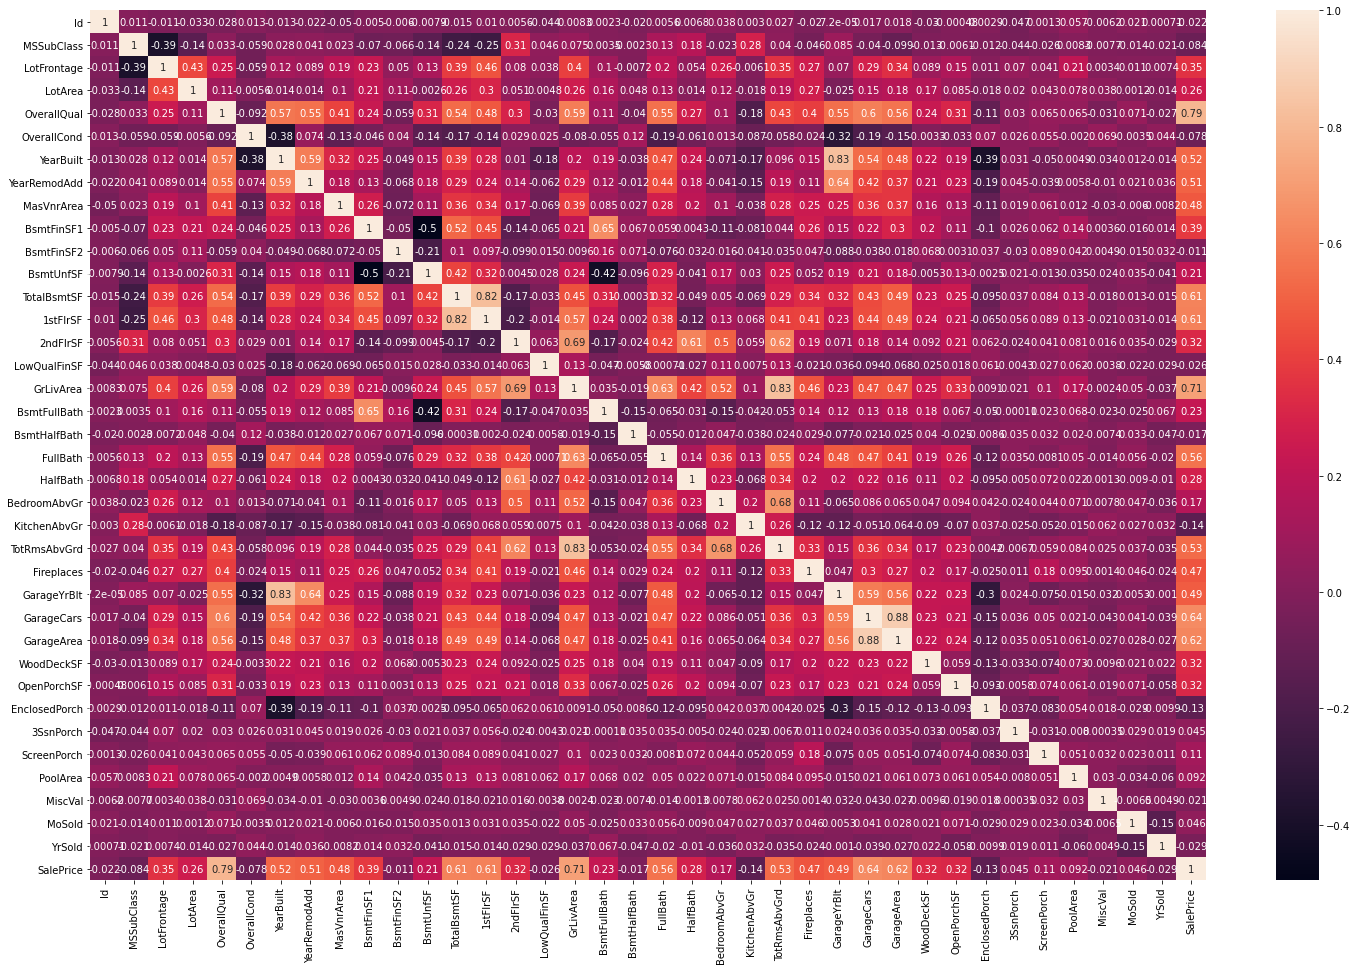

In [4193]:
plt.figure(figsize=(25,16))
sns.heatmap(numeric_df.corr(),annot=True)
plt.show()

#### Univariate Analysis of Numerical features

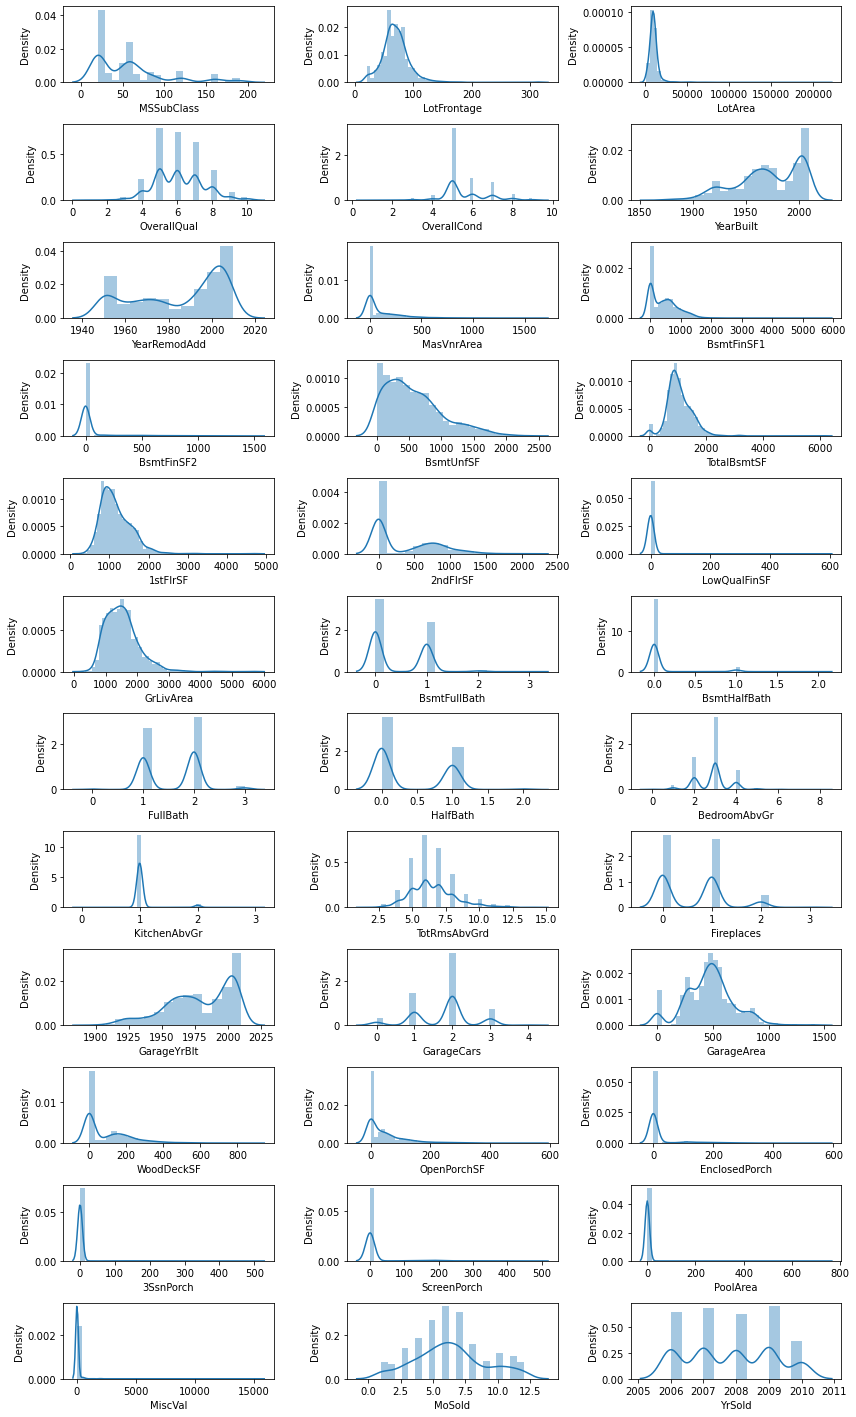

In [4194]:
fig=plt.subplots(figsize=(12, 21))
i=0
for feature in numeric_df.columns:
    if feature not in ['Id', 'SalePrice']:
        i+=1
        plt.subplot(13, 3, i)
        sns.distplot(housing[feature])
        plt.tight_layout()

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

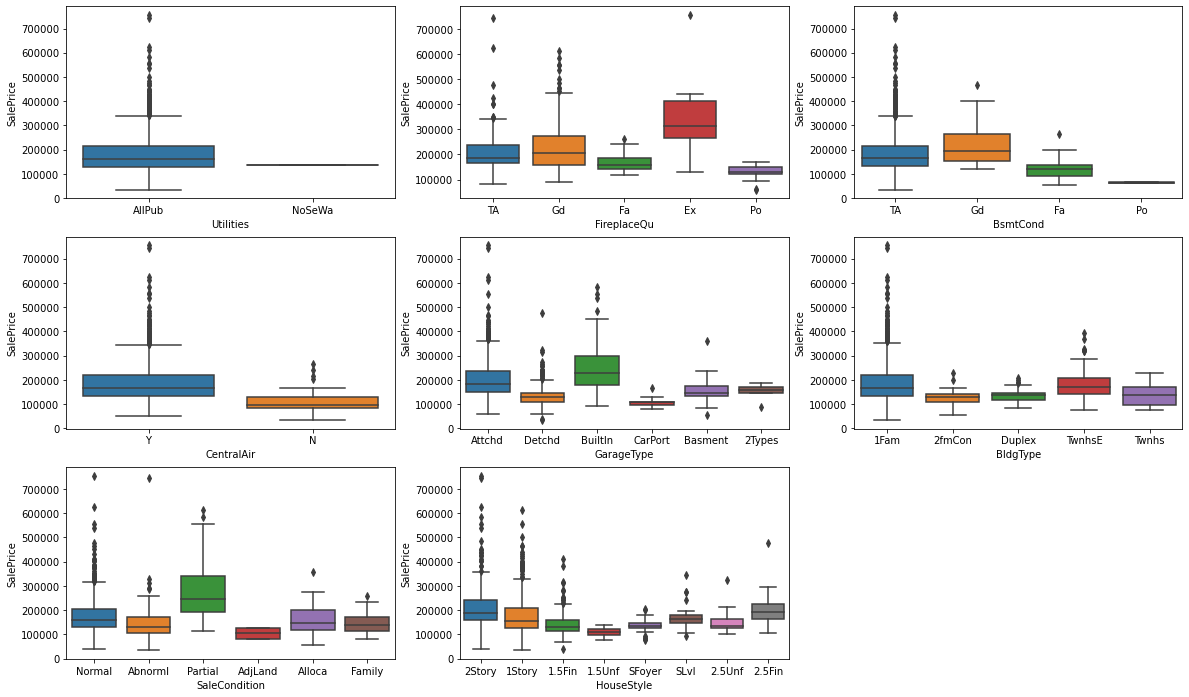

In [4195]:
#Visualising the categorical variables using a box plot

plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x='Utilities',y='SalePrice',data=housing)

plt.subplot(3,3,2)
sns.boxplot(x='FireplaceQu',y='SalePrice',data=housing)

plt.subplot(3,3,3)
sns.boxplot(x='BsmtCond',y='SalePrice',data=housing)

plt.subplot(3,3,4)
sns.boxplot(x='CentralAir',y='SalePrice',data=housing)

plt.subplot(3,3,5)
sns.boxplot(x='GarageType',y='SalePrice',data=housing)

plt.subplot(3,3,6)
sns.boxplot(x='BldgType',y='SalePrice',data=housing)

plt.subplot(3,3,7)
sns.boxplot(x='SaleCondition',y='SalePrice',data=housing)

plt.subplot(3,3,8)
sns.boxplot(x='HouseStyle',y='SalePrice',data=housing)

####  Multiple variables have multi colinearity with each other:
 - GarageCars and GarageArea (0.88)
 - GarageYrBlt and YearBuilt (0.83)
 - TotRmsAbvGrd and GrLivArea (0.83)
 - TotalBsmtSF and 1stflrSF (0.82)
 - 1stflrSF and GrLivArea (0.69)
 - TotRmsAbvGrd and BedroomAbvGrd (0.68)
 

 
 We need to drop one of them from the above pair.Also we need to drop some variables which has very low corealtion with the Sale price dependent variable.

In [4196]:
housing.drop(['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF', 'BedroomAbvGr','BsmtFinSF2', 'LowQualFinSF', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch','ScreenPorch','PoolArea','MiscVal','BsmtFinSF1','BsmtFullBath','BsmtHalfBath','WoodDeckSF','HalfBath'], axis=1, inplace=True)
print(housing.columns.shape)

(59,)


In [4197]:
round(100 * housing.isnull().mean(),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinType2      2.60
BsmtUnfSF         0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF          0.00
FullBath          0.00
KitchenQual       0.00
TotRmsAbvGr

In [4198]:
# Since MasVnrArea has only 1% data missing, dropping rows with NULL values in MasVnrArea
# Dropping Id column as it does not contribute towards predicting SalePrice
housing = housing[~housing['MasVnrArea'].isnull()]
housing.drop(['Id'], axis=1, inplace=True)

In [4199]:
round(100 * housing.isnull().mean(),2)

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.70
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.00
MasVnrArea        0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.55
BsmtCond          2.55
BsmtExposure      2.62
BsmtFinType1      2.55
BsmtFinType2      2.62
BsmtUnfSF         0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF          0.00
FullBath          0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional 

In [4200]:
print(housing['Electrical'].isnull().sum())
housing.dropna(subset=['Electrical'], inplace=True)


1


In [4201]:
##Here we can drop the rows having missing values since this column seems to be an important predictor.
housing = housing[~pd.isnull(housing['LotFrontage'])]
housing = housing[~pd.isnull(housing['BsmtQual'])]
housing = housing[~pd.isnull(housing['BsmtCond'])]
housing = housing[~pd.isnull(housing['BsmtExposure'])]
housing = housing[~pd.isnull(housing['BsmtFinType1'])]
housing = housing[~pd.isnull(housing['BsmtFinType2'])]
housing = housing[~pd.isnull(housing['FireplaceQu'])]
housing = housing[~pd.isnull(housing['GarageType'])]
housing = housing[~pd.isnull(housing['GarageFinish'])]
housing = housing[~pd.isnull(housing['GarageQual'])]
housing = housing[~pd.isnull(housing['GarageCond'])]

In [4202]:
round(100 * housing.isnull().mean(),2)

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinType2     0.0
BsmtUnfSF        0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
FullBath         0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces       0.0
FireplaceQu      0.0
GarageType       0.0
GarageFinish 

#### Lets understand the Categorical variables below 
We will analyse the below categorical variables and delete those ones 
whose percentage is higher for a single value alone 

In [4203]:
housing['Street'].value_counts(normalize=True)


Pave    0.998285
Grvl    0.001715
Name: Street, dtype: float64

In [4204]:
housing['LotShape'].value_counts(normalize=True)

Reg    0.602058
IR1    0.360206
IR2    0.027444
IR3    0.010292
Name: LotShape, dtype: float64

In [4205]:
housing['LandContour'].value_counts(normalize=True)

Lvl    0.888508
HLS    0.054889
Bnk    0.041166
Low    0.015437
Name: LandContour, dtype: float64

In [4206]:
housing['Utilities'].value_counts(normalize=True)#skip

AllPub    1.0
Name: Utilities, dtype: float64

In [4207]:
housing['LotConfig'].value_counts(normalize=True)

Inside     0.751286
Corner     0.164666
CulDSac    0.058319
FR2        0.022298
FR3        0.003431
Name: LotConfig, dtype: float64

In [4208]:
housing['LandSlope'].value_counts(normalize=True)

Gtl    0.946827
Mod    0.046312
Sev    0.006861
Name: LandSlope, dtype: float64

In [4209]:
housing['Neighborhood'].value_counts(normalize=True)

NAmes      0.125214
NridgHt    0.114923
CollgCr    0.072041
Gilbert    0.068611
NWAmes     0.063465
Somerst    0.061750
Crawfor    0.060034
NoRidge    0.054889
OldTown    0.048027
Timber     0.044597
SawyerW    0.044597
Edwards    0.034305
Sawyer     0.034305
BrkSide    0.030875
StoneBr    0.030875
Blmngtn    0.022298
SWISU      0.018868
Mitchel    0.013722
ClearCr    0.012007
Veenker    0.012007
NPkVill    0.010292
IDOTRR     0.010292
MeadowV    0.006861
Blueste    0.003431
BrDale     0.001715
Name: Neighborhood, dtype: float64

In [4210]:
housing['Condition1'].value_counts(normalize=True)

Norm      0.873070
Artery    0.039451
Feedr     0.037736
RRAn      0.022298
PosN      0.013722
PosA      0.006861
RRAe      0.003431
RRNn      0.003431
Name: Condition1, dtype: float64

In [4211]:
housing['Condition2'].value_counts(normalize=True)

Norm      0.993139
PosN      0.003431
PosA      0.001715
Artery    0.001715
Name: Condition2, dtype: float64

In [4212]:
housing['BldgType'].value_counts(normalize=True)

1Fam      0.874786
TwnhsE    0.094340
Twnhs     0.015437
2fmCon    0.013722
Duplex    0.001715
Name: BldgType, dtype: float64

In [4213]:
housing['HouseStyle'].value_counts(normalize=True)

1Story    0.459691
2Story    0.372213
1.5Fin    0.096055
SLvl      0.041166
2.5Unf    0.012007
2.5Fin    0.008576
SFoyer    0.005146
1.5Unf    0.005146
Name: HouseStyle, dtype: float64

In [4214]:
housing['RoofStyle'].value_counts(normalize=True)

Gable      0.706690
Hip        0.269297
Gambrel    0.008576
Flat       0.008576
Mansard    0.006861
Name: RoofStyle, dtype: float64

In [4215]:
housing['RoofMatl'].value_counts(normalize=True)

CompShg    0.975986
WdShngl    0.008576
Tar&Grv    0.008576
WdShake    0.003431
ClyTile    0.001715
Membran    0.001715
Name: RoofMatl, dtype: float64

In [4216]:
housing['Exterior1st'].value_counts(normalize=True)

VinylSd    0.409949
HdBoard    0.128645
Wd Sdng    0.120069
MetalSd    0.108062
Plywood    0.080617
CemntBd    0.054889
BrkFace    0.046312
WdShing    0.022298
Stucco     0.020583
AsbShng    0.005146
Stone      0.001715
ImStucc    0.001715
Name: Exterior1st, dtype: float64

In [4217]:
housing['Exterior2nd'].value_counts(normalize=True)

VinylSd    0.404803
HdBoard    0.116638
Wd Sdng    0.114923
MetalSd    0.108062
Plywood    0.096055
CmentBd    0.054889
BrkFace    0.027444
Wd Shng    0.027444
Stucco     0.020583
Brk Cmn    0.008576
AsbShng    0.006861
ImStucc    0.006861
Stone      0.003431
Other      0.001715
AsphShn    0.001715
Name: Exterior2nd, dtype: float64

In [4218]:
housing['MasVnrType'].value_counts(normalize=True)

None       0.487136
BrkFace    0.355060
Stone      0.149228
BrkCmn     0.008576
Name: MasVnrType, dtype: float64

In [4219]:
housing['ExterCond'].value_counts(normalize=True)

TA    0.909091
Gd    0.080617
Fa    0.006861
Ex    0.003431
Name: ExterCond, dtype: float64

In [4220]:
housing['Foundation'].value_counts(normalize=True)

PConc     0.548885
CBlock    0.355060
BrkTil    0.092624
Stone     0.003431
Name: Foundation, dtype: float64

In [4221]:
housing['BsmtQual'].value_counts(normalize=True)

Gd    0.476844
TA    0.337907
Ex    0.171527
Fa    0.013722
Name: BsmtQual, dtype: float64

In [4222]:
housing['BsmtCond'].value_counts(normalize=True)

TA    0.915952
Gd    0.058319
Fa    0.025729
Name: BsmtCond, dtype: float64

In [4223]:
housing['BsmtExposure'].value_counts(normalize=True)

No    0.620926
Av    0.169811
Gd    0.125214
Mn    0.084048
Name: BsmtExposure, dtype: float64

In [4224]:
housing['BsmtFinType1'].value_counts(normalize=True)

GLQ    0.351630
Unf    0.298456
ALQ    0.150943
BLQ    0.082333
Rec    0.075472
LwQ    0.041166
Name: BsmtFinType1, dtype: float64

In [4225]:
housing['BsmtFinType2'].value_counts(normalize=True)

Unf    0.893654
Rec    0.032590
LwQ    0.030875
BLQ    0.017153
GLQ    0.015437
ALQ    0.010292
Name: BsmtFinType2, dtype: float64

In [4226]:
housing['Heating'].value_counts(normalize=True)

GasA    0.984563
GasW    0.013722
OthW    0.001715
Name: Heating, dtype: float64

In [4227]:
housing['HeatingQC'].value_counts(normalize=True)

Ex    0.620926
TA    0.217839
Gd    0.138937
Fa    0.022298
Name: HeatingQC, dtype: float64

In [4228]:
housing['CentralAir'].value_counts(normalize=True)

Y    0.979417
N    0.020583
Name: CentralAir, dtype: float64

In [4229]:
housing['Electrical'].value_counts(normalize=True)

SBrkr    0.958834
FuseA    0.034305
FuseF    0.006861
Name: Electrical, dtype: float64

In [4230]:
housing['KitchenQual'].value_counts(normalize=True)

Gd    0.473413
TA    0.370497
Ex    0.142367
Fa    0.013722
Name: KitchenQual, dtype: float64

In [4231]:
housing['Functional'].value_counts(normalize=True)

Typ     0.945111
Min2    0.018868
Min1    0.017153
Mod     0.008576
Maj1    0.008576
Maj2    0.001715
Name: Functional, dtype: float64

In [4232]:
housing['FireplaceQu'].value_counts(normalize=True)

Gd    0.540309
TA    0.363636
Fa    0.041166
Ex    0.034305
Po    0.020583
Name: FireplaceQu, dtype: float64

In [4233]:
housing['GarageType'].value_counts(normalize=True)

Attchd     0.734134
Detchd     0.161235
BuiltIn    0.087479
Basment    0.013722
2Types     0.001715
CarPort    0.001715
Name: GarageType, dtype: float64

In [4234]:
housing['GarageFinish'].value_counts(normalize=True)

Fin    0.373928
RFn    0.324185
Unf    0.301887
Name: GarageFinish, dtype: float64

In [4235]:
housing['GarageQual'].value_counts(normalize=True)

TA    0.953688
Fa    0.025729
Gd    0.017153
Ex    0.003431
Name: GarageQual, dtype: float64

In [4236]:
housing['GarageCond'].value_counts(normalize=True)

TA    0.981132
Fa    0.013722
Ex    0.001715
Gd    0.001715
Po    0.001715
Name: GarageCond, dtype: float64

In [4237]:
housing['PavedDrive'].value_counts(normalize=True)

Y    0.953688
P    0.024014
N    0.022298
Name: PavedDrive, dtype: float64

In [4238]:
housing['SaleType'].value_counts(normalize=True)

WD       0.828473
New      0.142367
COD      0.013722
ConLw    0.005146
CWD      0.005146
Con      0.001715
ConLD    0.001715
ConLI    0.001715
Name: SaleType, dtype: float64

In [4239]:
housing['SaleCondition'].value_counts(normalize=True)

Normal     0.795883
Partial    0.144082
Abnorml    0.041166
Family     0.015437
Alloca     0.003431
Name: SaleCondition, dtype: float64

In [4240]:
#Let us delete the below categorical variables as they have either high percentage of unique values or some are not important for the prediction 
housing.drop(['MSZoning'], axis=1, inplace=True)
housing.drop(['Street'], axis=1, inplace=True)
housing.drop(['LandContour'], axis=1, inplace=True)
housing.drop(['Utilities'], axis=1, inplace=True)
housing.drop(['LandSlope'], axis=1, inplace=True)
housing.drop(['Condition1'], axis=1, inplace=True)
housing.drop(['Condition2'], axis=1, inplace=True)
housing.drop(['RoofStyle'], axis=1, inplace=True)
housing.drop(['RoofMatl'], axis=1, inplace=True)
housing.drop(['Exterior1st'], axis=1, inplace=True)
housing.drop(['Exterior2nd'], axis=1, inplace=True)
housing.drop(['ExterCond'], axis=1, inplace=True)
housing.drop(['BsmtCond'], axis=1, inplace=True)
housing.drop(['BsmtExposure'], axis=1, inplace=True)
housing.drop(['BsmtFinType2'], axis=1, inplace=True)
housing.drop(['Heating'], axis=1, inplace=True)
housing.drop(['CentralAir'], axis=1, inplace=True)
housing.drop(['Electrical'], axis=1, inplace=True)
housing.drop(['Functional'], axis=1, inplace=True)
housing.drop(['GarageQual'], axis=1, inplace=True)
housing.drop(['GarageCond'], axis=1, inplace=True)
housing.drop(['PavedDrive'], axis=1, inplace=True)
housing.drop(['SaleType'], axis=1, inplace=True)
housing.drop(['FireplaceQu'], axis=1, inplace=True)
#housing.drop(['GarageFinish'], axis=1, inplace=True)
housing.drop(['LotConfig'], axis=1, inplace=True)
housing.drop(['MasVnrType'], axis=1, inplace=True)
housing.drop(['BsmtFinType1'], axis=1, inplace=True)
#housing.drop(['Neighborhood'], axis=1, inplace=True)
housing.drop(['ExterQual'], axis=1, inplace=True)
housing.drop(['BldgType'], axis=1, inplace=True)
housing.drop(['Foundation'], axis=1, inplace=True)
housing.drop(['BsmtQual'], axis=1, inplace=True)
housing.drop(['KitchenQual'], axis=1, inplace=True)
housing.drop(['LotShape'], axis=1, inplace=True)
housing.drop(['HeatingQC'], axis=1, inplace=True)
#housing.drop(['HouseStyle'], axis=1, inplace=True)
housing.drop(['GarageType'], axis=1, inplace=True)



In [4241]:
# Converting the year related features into number of years
for feature in ['YearBuilt','YearRemodAdd', 'YrSold']:
   housing[feature] = 2022 - housing[feature]

In [4242]:
# Find all the categorical variables in the dataset and define it in the variable housing_categorical

housing_categorical =housing.select_dtypes(exclude=['float64','int64'])
housing_categorical.columns

Index(['Neighborhood', 'HouseStyle', 'GarageFinish', 'SaleCondition'], dtype='object')

In [4243]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 1 to 1457
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     583 non-null    int64  
 1   LotFrontage    583 non-null    float64
 2   LotArea        583 non-null    int64  
 3   Neighborhood   583 non-null    object 
 4   HouseStyle     583 non-null    object 
 5   OverallQual    583 non-null    int64  
 6   OverallCond    583 non-null    int64  
 7   YearBuilt      583 non-null    int64  
 8   YearRemodAdd   583 non-null    int64  
 9   MasVnrArea     583 non-null    float64
 10  BsmtUnfSF      583 non-null    int64  
 11  1stFlrSF       583 non-null    int64  
 12  2ndFlrSF       583 non-null    int64  
 13  FullBath       583 non-null    int64  
 14  TotRmsAbvGrd   583 non-null    int64  
 15  Fireplaces     583 non-null    int64  
 16  GarageFinish   583 non-null    object 
 17  GarageArea     583 non-null    int64  
 18  OpenPorch

#### Creating Dummy variables

In [4244]:
#apply the getdummies method
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0


In [4245]:
#Concatenate the dummies df with the original df
housing = housing.drop(list(housing_categorical.columns), axis=1)
housing = pd.concat([housing, housing_dummies], axis=1)
housing.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,1stFlrSF,2ndFlrSF,FullBath,TotRmsAbvGrd,Fireplaces,GarageArea,OpenPorchSF,MoSold,YrSold,SalePrice,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1,20,80.0,9600,6,8,46,46,0.0,284,1262,0,2,6,1,460,0,5,15,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,21,20,162.0,434,920,866,2,6,1,608,42,9,14,223500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,107,52,0.0,540,961,756,1,7,1,642,35,2,16,140000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,60,84.0,14260,8,5,22,22,350.0,490,1145,1053,2,9,1,836,84,12,14,250000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
6,20,75.0,10084,8,5,18,17,186.0,317,1694,0,2,7,1,636,57,8,15,307000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0


#### Splitting into train and test

In [4246]:
# We specify this so that the train and test data set always have the same rows, respectively
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [4247]:
#Let us create a list of numerical variables and store in num_feat
num_feat=['MSSubClass','OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','LotFrontage', 'LotArea',
          'BsmtUnfSF','1stFlrSF','2ndFlrSF','OverallCond',
                   'FullBath',
          'TotRmsAbvGrd','Fireplaces',
          'GarageArea','OpenPorchSF'
          ,'MoSold','YrSold','SalePrice']


In [4248]:
#ReScaling using the Standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_train[num_feat] = sc.fit_transform(df_train[num_feat])
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,1stFlrSF,2ndFlrSF,FullBath,TotRmsAbvGrd,Fireplaces,GarageArea,OpenPorchSF,MoSold,YrSold,SalePrice,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1183,-0.681416,-0.587107,0.008237,-1.363095,0.541978,1.909664,1.935946,-0.681740,-0.749624,-0.431659,-0.890203,-1.362338,-1.342760,-0.374892,0.840653,-0.783439,-0.175362,1.306816,-1.094303,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1315,0.099533,0.398978,0.056633,-0.589600,-0.486520,0.294758,0.988865,-0.681740,-1.005538,-0.526921,1.265216,0.528254,1.262929,2.457622,0.127017,-0.783439,-0.175362,-0.199345,-0.143595,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
46,-0.160783,-1.060428,0.364080,0.183895,-0.486520,-0.825790,-0.705913,-0.681740,-1.199034,0.541016,0.443198,-1.362338,-0.691338,-0.374892,0.592862,-0.203079,0.554715,-0.952425,0.215092,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,0.359849,-0.981541,-1.452444,0.183895,2.598973,2.074450,-0.805606,-0.681740,-0.100476,-0.968135,1.032769,-1.362338,-0.039916,-0.374892,-1.914775,-0.783439,-0.175362,-0.952425,-0.711394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
408,0.099533,1.345619,0.598493,0.183895,-0.486520,-0.924662,-0.855452,0.853256,0.839956,-0.579566,1.436382,0.528254,1.262929,-0.374892,1.965620,0.053358,0.554715,0.553736,0.656137,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1


In [4249]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [4250]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [4251]:
coeff = pd.DataFrame(regressor.coef_, X_train.columns, columns=['Coefficients'])
coeff

,Coefficients
MSSubClass,-0.067145
LotFrontage,-0.000359
LotArea,0.052214
OverallQual,0.250923
OverallCond,0.104276
YearBuilt,-0.058351
YearRemodAdd,0.020761
MasVnrArea,0.053172
BsmtUnfSF,-0.104548
1stFlrSF,0.320510


In [4252]:
regressor.intercept_

-0.19321313101841106

In [4253]:
num_feat=['MSSubClass','OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','LotFrontage', 'LotArea',
          'BsmtUnfSF','1stFlrSF','2ndFlrSF','OverallCond',
          'FullBath',
          'TotRmsAbvGrd','Fireplaces',
          'GarageArea','OpenPorchSF'
          ,'MoSold','YrSold','SalePrice']
df_test[num_feat] = sc.transform(df_test[num_feat])

In [4254]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [4255]:
y_pred = regressor.predict(X_test)

In [4256]:
df = pd.DataFrame({
    'Actual':y_test,
    'Predicted': y_pred
})
df

,Actual,Predicted
692,1.257851,0.712320
987,1.916366,1.920775
379,-0.448828,-0.444273
298,-0.492589,-0.370505
374,-0.005748,-0.215046
313,1.695461,2.537175
478,0.842121,0.506502
1288,0.634257,0.795806
1386,0.327930,0.620344
292,-0.973960,-1.233760


In [4257]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6565223230699875

#### Linear regression using RFE

In [4258]:
# We specify this so that the train and test data set always have the same rows, respectively
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [4259]:
#Let us make the list of numerical variables
num_feat=['MSSubClass','OverallQual','YearBuilt','YearRemodAdd','LotFrontage', 'LotArea','MasVnrArea',
          'BsmtUnfSF','1stFlrSF','2ndFlrSF','OverallCond',
          'FullBath',
          'TotRmsAbvGrd','Fireplaces',
          'GarageArea','OpenPorchSF'
          ,'MoSold','YrSold','SalePrice']

In [4260]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

df_train[num_feat] = sc.fit_transform(df_train[num_feat])
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,1stFlrSF,2ndFlrSF,FullBath,TotRmsAbvGrd,Fireplaces,GarageArea,OpenPorchSF,MoSold,YrSold,SalePrice,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1183,-0.681416,-0.587107,0.008237,-1.363095,0.541978,1.909664,1.935946,-0.681740,-0.749624,-0.431659,-0.890203,-1.362338,-1.342760,-0.374892,0.840653,-0.783439,-0.175362,1.306816,-1.094303,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1315,0.099533,0.398978,0.056633,-0.589600,-0.486520,0.294758,0.988865,-0.681740,-1.005538,-0.526921,1.265216,0.528254,1.262929,2.457622,0.127017,-0.783439,-0.175362,-0.199345,-0.143595,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
46,-0.160783,-1.060428,0.364080,0.183895,-0.486520,-0.825790,-0.705913,-0.681740,-1.199034,0.541016,0.443198,-1.362338,-0.691338,-0.374892,0.592862,-0.203079,0.554715,-0.952425,0.215092,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,0.359849,-0.981541,-1.452444,0.183895,2.598973,2.074450,-0.805606,-0.681740,-0.100476,-0.968135,1.032769,-1.362338,-0.039916,-0.374892,-1.914775,-0.783439,-0.175362,-0.952425,-0.711394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
408,0.099533,1.345619,0.598493,0.183895,-0.486520,-0.924662,-0.855452,0.853256,0.839956,-0.579566,1.436382,0.528254,1.262929,-0.374892,1.965620,0.053358,0.554715,0.553736,0.656137,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1


In [4261]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [4262]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [4263]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [4264]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 3),
 ('LotFrontage', False, 36),
 ('LotArea', False, 10),
 ('OverallQual', True, 1),
 ('OverallCond', False, 6),
 ('YearBuilt', False, 18),
 ('YearRemodAdd', False, 31),
 ('MasVnrArea', False, 11),
 ('BsmtUnfSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('FullBath', False, 34),
 ('TotRmsAbvGrd', False, 8),
 ('Fireplaces', False, 13),
 ('GarageArea', False, 4),
 ('OpenPorchSF', False, 32),
 ('MoSold', False, 24),
 ('YrSold', False, 29),
 ('Neighborhood_Blueste', False, 30),
 ('Neighborhood_BrDale', False, 27),
 ('Neighborhood_BrkSide', False, 21),
 ('Neighborhood_ClearCr', False, 2),
 ('Neighborhood_CollgCr', False, 22),
 ('Neighborhood_Crawfor', False, 15),
 ('Neighborhood_Edwards', True, 1),
 ('Neighborhood_Gilbert', False, 28),
 ('Neighborhood_IDOTRR', True, 1),
 ('Neighborhood_MeadowV', True, 1),
 ('Neighborhood_Mitchel', False, 33),
 ('Neighborhood_NAmes', True, 1),
 ('Neighborhood_NPkVill', False, 20),
 ('Neighborhood_NWAmes', True, 1),
 ('

In [4265]:
#This list contains the variables supported by RFE
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'HouseStyle_1.5Unf', 'HouseStyle_2.5Unf', 'GarageFinish_RFn',
       'SaleCondition_Partial'],
      dtype='object')

In [4266]:
#This list contains the variables not selected by RFE
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageArea', 'OpenPorchSF', 'MoSold', 'YrSold', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Gilbert',
       'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_SawyerW',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'HouseStyle_1Story',
       'HouseStyle_2.5Fin', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'GarageFinish_Unf', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal'],
      dtype='object')

#### Building the model

In [4267]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [4268]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [4269]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [4270]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     85.55
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          1.90e-128
Time:                        08:28:51   Log-Likelihood:                -234.10
No. Observations:                 408   AIC:                             510.2
Df Residuals:                     387   BIC:                             594.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.05

#### Methods to decide which variables to elimainate 
- significance based on p-values
- VIF
- Both the methods are taken into consideration to eliminate the respective variables 

The below scenarios will help to solve the different conditions
- High p value high vif(we remove them)
- High-low
- 1)High p value low vif (remove them first)
- 2)Low p value high vif (remove after first)
- Low p value low vif (keep them)

In [4271]:
#HouseStyle_1.5Unf has high p value lets drop it
X_train_new = X_train_rfe.drop(["HouseStyle_1.5Unf"], axis = 1)

In [4272]:
#Rebuilding the model without weekday_Sun
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [4273]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [4274]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     90.20
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          2.30e-129
Time:                        08:28:52   Log-Likelihood:                -234.26
No. Observations:                 408   AIC:                             508.5
Df Residuals:                     388   BIC:                             588.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.05

In [4275]:
#Drop the constant before computation of VIF
X_train_new = X_train_new.drop(['const'], axis=1)

In [4276]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,OverallQual,3.05
2,1stFlrSF,2.03
10,Neighborhood_NridgHt,1.66
3,2ndFlrSF,1.63
17,GarageFinish_RFn,1.51
18,SaleCondition_Partial,1.45
11,Neighborhood_OldTown,1.33
14,Neighborhood_Somerst,1.29
16,HouseStyle_2.5Unf,1.28
9,Neighborhood_NoRidge,1.28


In [4277]:
#Neighborhood_IDOTRR has high p value ,lets try dropping it next
X_train_new = X_train_new.drop(["Neighborhood_IDOTRR"], axis = 1)

In [4278]:
#Rebuilding the model without bedrooms
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [4279]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [4280]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     95.28
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          3.08e-130
Time:                        08:28:53   Log-Likelihood:                -234.57
No. Observations:                 408   AIC:                             507.1
Df Residuals:                     389   BIC:                             583.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.05

In [4281]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,OverallQual,3.02
2,1stFlrSF,2.02
9,Neighborhood_NridgHt,1.65
3,2ndFlrSF,1.62
16,GarageFinish_RFn,1.50
17,SaleCondition_Partial,1.45
10,Neighborhood_OldTown,1.33
13,Neighborhood_Somerst,1.29
15,HouseStyle_2.5Unf,1.28
8,Neighborhood_NoRidge,1.27


In [4282]:
#Neighborhood_Sawyer has high p value,lets drop this variable next
X_train_new = X_train_new.drop(["Neighborhood_Sawyer"], axis = 1)

In [4283]:
#Rebuilding the model 
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [4284]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [4285]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     100.9
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          4.72e-131
Time:                        08:28:55   Log-Likelihood:                -235.04
No. Observations:                 408   AIC:                             506.1
Df Residuals:                     390   BIC:                             578.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.06

In [4286]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,OverallQual,2.83
2,1stFlrSF,2.00
9,Neighborhood_NridgHt,1.64
3,2ndFlrSF,1.62
15,GarageFinish_RFn,1.48
16,SaleCondition_Partial,1.45
10,Neighborhood_OldTown,1.32
12,Neighborhood_Somerst,1.29
14,HouseStyle_2.5Unf,1.28
8,Neighborhood_NoRidge,1.27


In [4287]:
#Neighborhood_NWAmes has high p value,lets drop this next
X_train_new = X_train_new.drop(["Neighborhood_NWAmes"], axis = 1)

In [4288]:
#Rebuilding the model 
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [4289]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [4290]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     107.0
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          9.13e-132
Time:                        08:28:56   Log-Likelihood:                -235.79
No. Observations:                 408   AIC:                             505.6
Df Residuals:                     391   BIC:                             573.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.07

In [4291]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,OverallQual,2.83
2,1stFlrSF,2.00
8,Neighborhood_NridgHt,1.64
3,2ndFlrSF,1.62
15,SaleCondition_Partial,1.45
14,GarageFinish_RFn,1.37
9,Neighborhood_OldTown,1.32
11,Neighborhood_Somerst,1.29
13,HouseStyle_2.5Unf,1.28
7,Neighborhood_NoRidge,1.27


In [4292]:
#Neighborhood_MeadowV has high p value ,lets drop this as well
X_train_new = X_train_new.drop(["Neighborhood_MeadowV"], axis = 1)

In [4293]:
#Rebuilding the model
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [4294]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [4295]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     113.3
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          3.65e-132
Time:                        08:28:57   Log-Likelihood:                -237.33
No. Observations:                 408   AIC:                             506.7
Df Residuals:                     392   BIC:                             570.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.08

In [4296]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,OverallQual,2.78
2,1stFlrSF,1.99
7,Neighborhood_NridgHt,1.63
3,2ndFlrSF,1.61
14,SaleCondition_Partial,1.45
13,GarageFinish_RFn,1.37
8,Neighborhood_OldTown,1.32
10,Neighborhood_Somerst,1.29
12,HouseStyle_2.5Unf,1.28
6,Neighborhood_NoRidge,1.27


In [4297]:
#Neighborhood_OldTown has high p value ,lets drop this as well
X_train_new = X_train_new.drop(["Neighborhood_OldTown"], axis = 1)

In [4298]:
#Rebuilding the model
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [4299]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [4300]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     120.3
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          2.00e-132
Time:                        08:28:58   Log-Likelihood:                -239.23
No. Observations:                 408   AIC:                             508.5
Df Residuals:                     393   BIC:                             568.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.10

In [4301]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,OverallQual,2.66
2,1stFlrSF,1.98
7,Neighborhood_NridgHt,1.62
3,2ndFlrSF,1.58
13,SaleCondition_Partial,1.45
12,GarageFinish_RFn,1.37
9,Neighborhood_Somerst,1.28
6,Neighborhood_NoRidge,1.27
1,BsmtUnfSF,1.19
10,Neighborhood_StoneBr,1.19


#### Observations
- All the p-values of the variables are less than 0.05
- VIF values are in range (below 5)(There is no multicolinearity among the independant variables )
- This is our final model.

#### Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [4302]:
y_train_pred = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

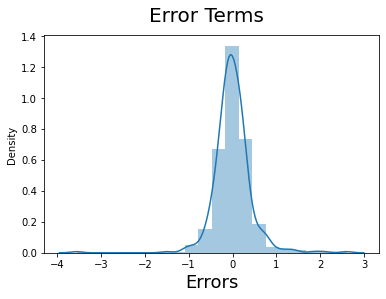

In [4303]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

#### Observations
- The error terms are normally ditributed
- Mean is centered around 0

#### Making Predictions and Evaluations on the test data 

In [4304]:
num_feat=['MSSubClass','OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','LotFrontage', 'LotArea',
          'BsmtUnfSF','1stFlrSF','2ndFlrSF','OverallCond',
          'FullBath',
          'TotRmsAbvGrd','Fireplaces',
          'GarageArea','OpenPorchSF'
          ,'MoSold','YrSold','SalePrice']
num_feat

df_test[num_feat] = sc.transform(df_test[num_feat])

In [4305]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [4306]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [4307]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

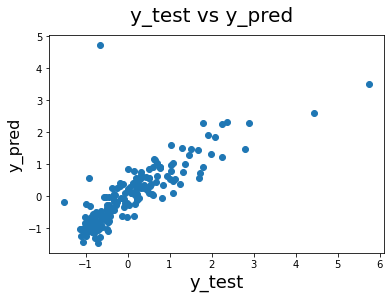

In [4308]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

#### Computation of R2 on train and test set

In [4309]:
r2_score(y_true=y_test,y_pred=y_pred)

0.6415038331130238

In [4310]:
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_pred))

0.810842690340716
0.6415038331130238


#### Inference
-  R2 square of 81 percent is achieved in the train set and an R2 sqaure of 64 percent is achieved on the test set

#### Top indicators for House Prices
 - OverallQual is a good indicator for predicting prices of appartments
 - Neighborhoods like Northridge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr are places where the  Sale    Price is higher
 - Knowing the First Floor square feet and Second floor square feet are important predictors for Sale Price 
  - Partial Homes  are more in demand and up for higher Sale Price.